In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Function to load the drug_dataset from a CSV file
def load_dataset():
    dataset = pd.read_csv('drug_dataset.csv')
    return dataset

# Function to get the shape (number of rows and columns) of the loaded dataset
def dataframe_shape():
    # Calling the load_dataset() function to load the data
    # and then getting the shape of the DataFrame using the shape attribute
    shape = load_dataset().shape
    return shape

# Define a function to calculate the sum of null values in a dataset
def sum_of_null_values():
    # Load the dataset and calculate the sum of null values for each column
    sumofnull = load_dataset().isnull().sum()
    # Return the resulting sum of null values
    return sumofnull

# Define a function to check the data types of columns in the dataset
def check_datatypes():
    # Load the dataset
    data = load_dataset().dtypes
    # Get data types of each column in the dataset
    return data

# Define a function to get descriptive statistics of the dataset
def data_describe():
    # Load the dataset and calculate descriptive statistics
    data = load_dataset().describe()
    # Return the descriptive statistics
    return data

# Define a function to check the count of the target variable in the dataset
def check_count_of_target_variable():
    # Load the dataset
    df = load_dataset()
    # Calculate the count of each unique value in the 'Drug' column ( it is the target variable)
    data = df['Drug'].value_counts()
    # Return the count of the target variable
    return data

# Function to check for duplicate rows in the DataFrame
def check_duplicates():
    # Load the dataset
    df = load_dataset()
    # Calculate the number of duplicate rows using the duplicated() method and sum them
    duplicates = df.duplicated().sum()
    # Return the count of duplicate rows
    return duplicates

# Function to drop duplicate rows from the DataFrame
def drop_duplicates():
    df = load_dataset()
    # Drop duplicate rows  with inplace=True
    df.drop_duplicates(inplace=True)
    return df

# Function to drop unnecessary columns from the DataFrame
def drop_unnecessary_columns():
    # Get DataFrame with duplicate rows dropped
    df = drop_duplicates()

    # Create a copy of the DataFrame to avoid modifying the original
    data = df.copy()

    # Drop the 'Allergy','Medication_Duration' column from the copied DataFrame
    data.drop(columns=['Allergy', 'Medication_Duration'], inplace=True)
    # Return the DataFrame with the 'Allergy','Medication_Duration' column removed
    return data

def grouping_age():
    # Drop unnecessary columns from the DataFrame
    df = drop_unnecessary_columns()

    # Define a function to map ages to specific age groups
    def get_age_group(age):
        if age <= 30:
            return '0-30'
        elif 30 < age <= 40:
            return '30-40'
        elif 40 < age <= 50:
            return '40-50'
        elif 50 < age <= 60:
            return '50-60'
        else:
            return '60+'

    # Apply the age grouping function to create a new 'AgeGroup' column
    df['AgeGroup'] = df['Age'].apply(get_age_group)

    # Drop the original 'Age' column since we've created the 'AgeGroup' column
    df.drop(columns=['Age'], inplace=True)

    # Return the DataFrame with the age groups
    return df

def grouping_Na_to_K():
    # Group ages first
    df = grouping_age()

    # Define a function to map Na-to-K ratio values to specific groups
    '''The get_na_to_k_group(value) function categorizes Na-to-K ratio values into distinct groups.
     If the value is 10 or less, it falls into the '5-10' group. If the value is more than 10
     but not exceeding 15, it is in the '10-15' group, and so forth.If the value is more than 30,
     it belongs to the '30+' group'''
    def get_na_to_k_group(value):
        if value <= 10:
            return '5-10'
        elif 10 < value <= 15:
            return '10-15'
        elif 15 < value <= 20:
            return '15-20'
        elif 20 < value <= 25:
            return '20-25'
        elif 25 < value <= 30:
            return '25-30'
        else:
            return '30+'

    # Apply the Na-to-K grouping function to create a new 'Na_to_K_groups' column
    df['Na_to_K_groups'] = df['Na_to_K'].apply(get_na_to_k_group)

    # Drop the original 'Na_to_K' column since we've created the 'Na_to_K_groups' column
    df.drop(columns=['Na_to_K'], inplace=True)

    # Return the DataFrame with Na-to-K ratio groups
    return df

def plot_target_count():
    # Get DataFrame with 'Drug' column
    df = grouping_Na_to_K()

    # Count the occurrences of each 'Drug' and store it in a dictionary
    drug_counts = df['Drug'].value_counts().to_dict()

    # Extract the drug names and their corresponding counts
    drug_names = list(drug_counts.keys())
    counts = list(drug_counts.values())

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(drug_names, counts, color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.xlabel('Drug')
    plt.ylabel('Count')
    plt.title('Count of Each Target Class (Drug)')

    # Rotate the x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Save the plot to a file (if needed)
    plt.savefig('plotting_drug.png')

    # Show the plot (optional)
    plt.show()

# Function to plot the count of AgeGroup in the DataFrame
def plot_countplot_AgeGroup():
    # Get DataFrame with categorical variables encoded
    data = grouping_Na_to_K()

    # Count the occurrences of each 'AgeGroup' and store it in a dictionary
    AgeGroup_counts = data['AgeGroup'].value_counts().to_dict()

    # Extract the drug names and their corresponding counts
    AgeGroup_names = list(AgeGroup_counts.keys())
    counts = list(AgeGroup_counts.values())

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(AgeGroup_names, counts, color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.xlabel('AgeGroup')
    plt.ylabel('Count')
    plt.title('Count of Each AgeGroup')

    # Rotate the x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Save the plot to a file (if needed)
    plt.savefig('plotting_AgeGroup.png')

    # Show the plot (optional)
    plt.show()


# Function to plot the count of each gender in the DataFrame
def countplot_gender():
    data = grouping_Na_to_K()

    # Count the occurrences of each 'Sex' and store it in a dictionary
    Sex_counts = data['Sex'].value_counts().to_dict()

    # Extract the drug names and their corresponding counts
    Sex_names = list(Sex_counts.keys())
    counts = list(Sex_counts.values())

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(Sex_names, counts, color=['blue', 'green'])
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.title('Count of Each Sex')

    # Rotate the x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Save the plot to a file (if needed)
    plt.savefig('plotting_Sex.png')

    # Show the plot (optional)
    plt.show()

# Function to plot the count of bp in the DataFrame
def countplot_BP():
    data = grouping_Na_to_K()
    # Count the occurrences of each 'BP' and store it in a dictionary
    BP_counts = data['BP'].value_counts().to_dict()

    # Extract the drug names and their corresponding counts
    BP_names = list(BP_counts.keys())
    counts = list(BP_counts.values())

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(BP_names, counts, color=['blue', 'green', 'yellow'])
    plt.xlabel('BP')
    plt.ylabel('Count')
    plt.title('Count of Each BP')

    # Rotate the x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Save the plot to a file (if needed)
    plt.savefig('plotting_BP.png')

    # Show the plot (optional)
    plt.show()

# Function to plot the count of each Cholesterol category in the DataFrame
def countplot_Cholesterol():
    data = grouping_Na_to_K()
    # Count the occurrences of each 'Cholesterol' and store it in a dictionary
    Cholesterol_counts = data['Cholesterol'].value_counts().to_dict()

    # Extract the drug names and their corresponding counts
    Cholesterol_names = list(Cholesterol_counts.keys())
    counts = list(Cholesterol_counts.values())

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(Cholesterol_names, counts, color=['blue', 'green', 'yellow'])
    plt.xlabel('Cholesterol')
    plt.ylabel('Count')
    plt.title('Count of Each Cholesterol')

    # Rotate the x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Save the plot to a file (if needed)
    plt.savefig('plotting_Cholesterol.png')

    # Show the plot (optional)
    plt.show()

# Function to plot the count of each category of Na_to_K_groups
def countplot_Na_to_K_groups():
    data = grouping_Na_to_K()
    # Count the occurrences of each 'Na_to_K_groups' and store it in a dictionary
    Na_to_K_groups_counts = data['Na_to_K_groups'].value_counts().to_dict()

    # Extract the drug names and their corresponding counts
    Na_to_K_groups_names = list(Na_to_K_groups_counts.keys())
    counts = list(Na_to_K_groups_counts.values())

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(Na_to_K_groups_names, counts, color=['blue', 'green', 'yellow', 'orange', 'red','purple'])
    plt.xlabel('Na_to_K_groups')
    plt.ylabel('Count')
    plt.title('Count of Each Na_to_K_groups')

    # Rotate the x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Save the plot to a file (if needed)
    plt.savefig('plotting_Na_to_K_groups.png')

    # Show the plot (optional)
    plt.show()

def splitting_dataset():
    # Get DataFrame with categorical variables encoded
    data = grouping_Na_to_K()

    # Separate the features (X) and the target variable (y)
    X = data[['Sex','BP','Cholesterol','AgeGroup','Na_to_K_groups']]
    y = data[['Drug']]

    # Split the data into training and testing sets[train_size=0.8, test_size=0.2, random_state=4]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    # Return the split datasets
    return x_train, x_test, y_train, y_test

def get_dummies_smote_sampling():
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = splitting_dataset()  # Assuming you have a function 'splitting_dataset()' for data splitting

    # Encode categorical variables using one-hot encoding (get_dummies) on x_train and x_test.
    categorical_columns = ['Sex','BP','Cholesterol','AgeGroup','Na_to_K_groups']  # Replace with your actual column names
    encoder = OneHotEncoder()  # You can customize the encoding options
    x_train_encoded = encoder.fit_transform(x_train[categorical_columns])
    x_test_encoded = encoder.transform(x_test[categorical_columns])

    # Convert the encoded data to integer type
    x_train = x_train_encoded.astype(int)
    x_test = x_test_encoded.astype(int)

    # Apply Synthetic Minority Over-sampling Technique (SMOTE) to balance the training data (x_train and y_train)
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can customize the SMOTE options
    x_train, y_train = smote.fit_resample(x_train, y_train)

    # Return the balanced training set, testing set, and corresponding labels
    return x_train, x_test, y_train, y_test

def fit_logistic_regression():
    # Split the dataset into training and validation sets using splitting_dataset()
    X_train, X_validation, Y_train, Y_validation = get_dummies_smote_sampling()

    # Create a logistic_regression model
    model = LogisticRegression(random_state=42,)

    # Train (fit) the model using the training data
    model.fit(X_train, Y_train)

    # Make predictions on the validation set using the trained model
    Y_validation_pred = model.predict(X_validation)

    # Calculate the accuracy of the model's predictions
    accuracy = accuracy_score(Y_validation, Y_validation_pred)

    # Calculate the precision of the model's predictions
    precision = precision_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the recall of the model's predictions
    recall = recall_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the F1 score of the model's predictions
    f1 = f1_score(Y_validation, Y_validation_pred, average='micro')

    # Return the evaluation metrics (accuracy, precision, recall, and F1 score)
    return accuracy, precision, recall, f1

def fit_gaussiannb():
    # Split the dataset into training and validation sets using splitting_dataset()
    X_train, X_validation, Y_train, Y_validation = get_dummies_smote_sampling()

    # Create a Gaussian Naive Bayes classifier
    model = GaussianNB()

    # Convert sparse matrices to dense numpy arrays
    X_train = X_train.toarray()
    X_validation = X_validation.toarray()

    # Train (fit) the model using the training data
    model.fit(X_train, Y_train)

    # Make predictions on the validation set using the trained model
    Y_validation_pred = model.predict(X_validation)

    # Calculate the accuracy of the model's predictions
    accuracy = accuracy_score(Y_validation, Y_validation_pred)

    # Calculate the precision of the model's predictions
    precision = precision_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the recall of the model's predictions
    recall = recall_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the F1 score of the model's predictions
    f1 = f1_score(Y_validation, Y_validation_pred, average='micro')

    # Return the evaluation metrics (accuracy, precision, recall, and F1 score)
    return accuracy, precision, recall, f1

def fit_decision_tree():
    # Split the dataset into training and validation sets using task4_1.splitting_dataset()
    X_train, X_validation, Y_train, Y_validation = get_dummies_smote_sampling()

    # Create a Decision Tree classifier
    model = DecisionTreeClassifier(random_state=42)

    # Train (fit) the model using the training data
    model.fit(X_train, Y_train)

    # Make predictions on the validation set using the trained model
    Y_validation_pred = model.predict(X_validation)

    # Calculate the accuracy of the model's predictions
    accuracy = accuracy_score(Y_validation, Y_validation_pred)

    # Calculate the precision of the model's predictions
    precision = precision_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the recall of the model's predictions
    recall = recall_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the F1 score of the model's predictions
    f1 = f1_score(Y_validation, Y_validation_pred, average='micro')

    # Return the evaluation metrics (accuracy, precision, recall, and F1 score)
    return accuracy, precision, recall, f1

def fit_rf():
    # Split the dataset into training and validation sets using task4_1.splitting_dataset()
    X_train, X_validation, Y_train, Y_validation = get_dummies_smote_sampling()

    # Create a Random Forest classifier with the specified number of trees and maximum features
    model = RandomForestClassifier(random_state=42,n_estimators=100,max_features=3,)

    # Train (fit) the model using the training data
    model.fit(X_train, Y_train)

    # Make predictions on the validation set using the trained model
    Y_validation_pred = model.predict(X_validation)

    # Calculate the accuracy of the model's predictions
    accuracy = accuracy_score(Y_validation, Y_validation_pred)

    # Calculate the precision of the model's predictions
    precision = precision_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the recall of the model's predictions
    recall = recall_score(Y_validation, Y_validation_pred, average='micro')

    # Calculate the F1 score of the model's predictions
    f1 = f1_score(Y_validation, Y_validation_pred, average='micro')

    # Return the evaluation metrics (accuracy, precision, recall, and F1 score)
    return accuracy, precision, recall, f1

In [3]:
load_dataset()

,Age,Sex,BP,Cholesterol,Allergy,Na_to_K,Medication_Duration,Drug
0,23,F,HIGH,HIGH,Pollen,25.355,40,DrugY
1,47,M,LOW,HIGH,None,13.093,25,drugC
2,47,M,LOW,HIGH,Peanuts,10.114,25,drugC
3,28,F,NORMAL,HIGH,Shellfish,7.798,120,drugX
4,61,F,LOW,HIGH,Pollen,18.043,40,DrugY
...,...,...,...,...,...,...,...,...
234,35,M,NORMAL,NORMAL,None,7.845,40,drugX
235,47,M,LOW,NORMAL,None,33.542,25,DrugY
236,32,F,NORMAL,HIGH,None,7.477,25,drugX
237,70,F,NORMAL,HIGH,Pollen,20.489,120,DrugY


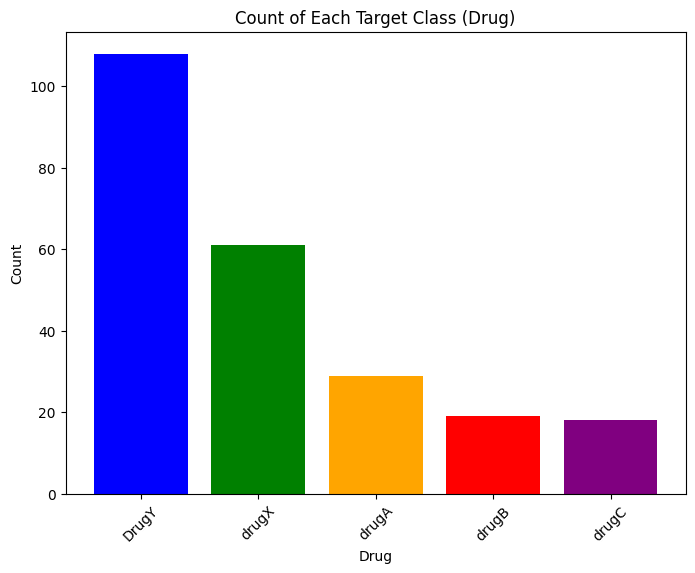

In [5]:
plot_target_count()

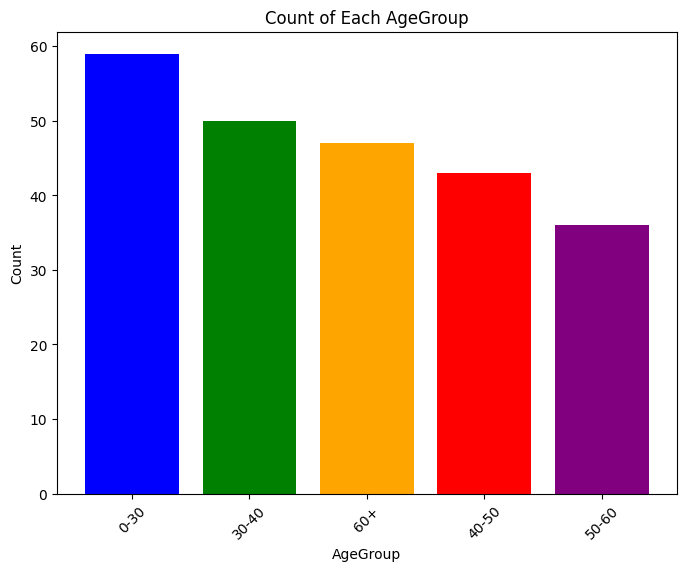

In [6]:
plot_countplot_AgeGroup()

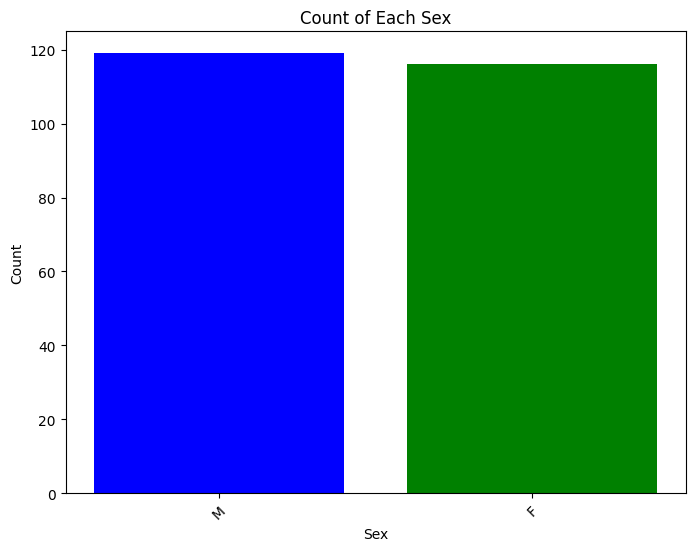

In [7]:
countplot_gender()

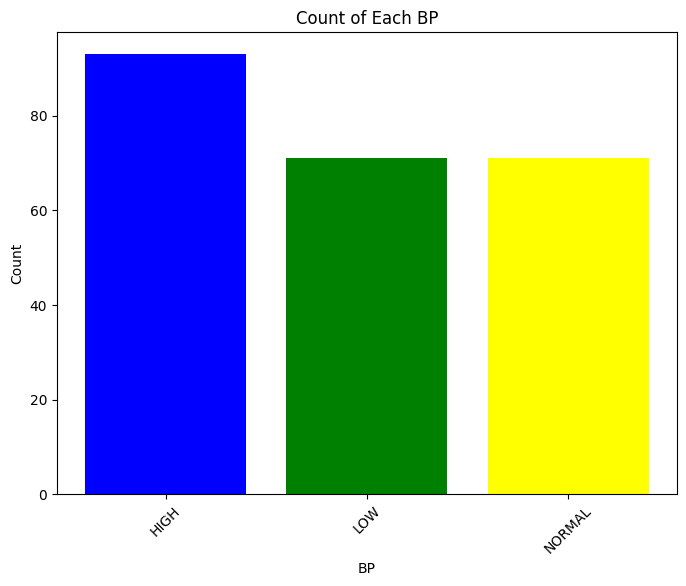

In [8]:
countplot_BP()

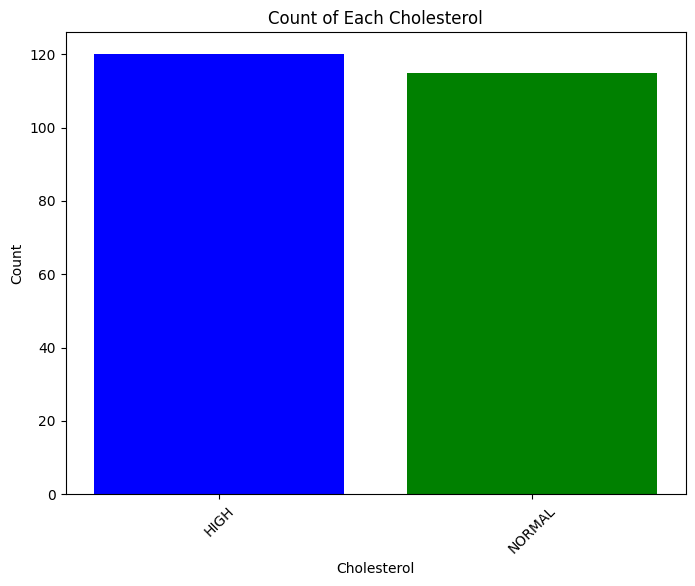

In [9]:
countplot_Cholesterol()

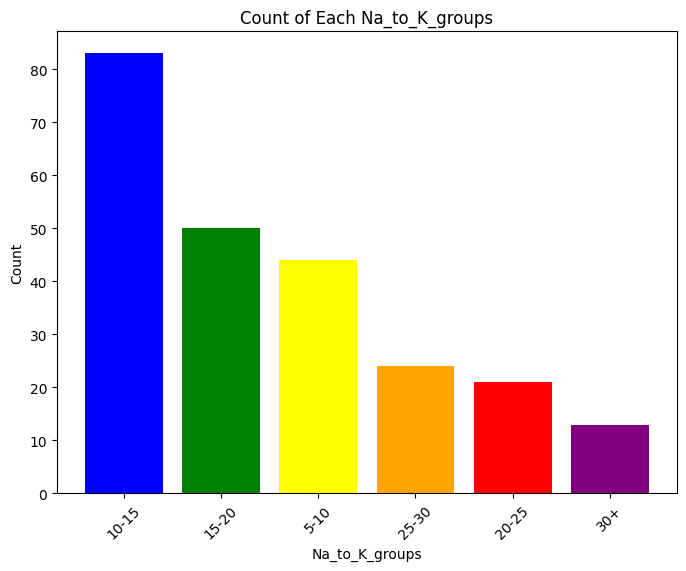

In [10]:
countplot_Na_to_K_groups()

In [30]:
accuracy, precision, recall, f1 = fit_logistic_regression()
print('Accuracy:',accuracy,'Precision:',precision,'Recall:',recall,'F1:',f1)

Accuracy: 1.0 Precision: 1.0 Recall: 1.0 F1: 1.0


In [35]:
accuracy, precision, recall, f1 = fit_gaussiannb()
print('Accuracy:',accuracy,'Precision:',precision,'Recall:',recall,'F1:',f1)

Accuracy: 1.0 Precision: 1.0 Recall: 1.0 F1: 1.0


In [36]:
accuracy, precision, recall, f1 = fit_decision_tree()
print('Accuracy:',accuracy,'Precision:',precision,'Recall:',recall,'F1:',f1)

Accuracy: 0.9787234042553191 Precision: 0.9787234042553191 Recall: 0.9787234042553191 F1: 0.9787234042553191


In [39]:
accuracy, precision, recall, f1 = fit_rf()
print('Accuracy:',accuracy,'Precision:',precision,'Recall:',recall,'F1:',f1)

Accuracy: 0.9787234042553191 Precision: 0.9787234042553191 Recall: 0.9787234042553191 F1: 0.9787234042553191
